## Assignment 2- Part 1

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np
#import matplotlib.ticker as ticker


%matplotlib inline

houses=pd.read_csv('houses.csv',sep=',', header=None,names=["Transaction unique identifier","Price","Date of Transfer","Postcode","Property Type","Old/New","Duration","Primary Addressable Object Name","Secondary Addressable Object Name","Street","Locality","Town/City","District","County","PPDCategory","Record Status"])

In [2]:
houses.head()

,Transaction unique identifier,Price,Date of Transfer,Postcode,Property Type,Old/New,Duration,Primary Addressable Object Name,Secondary Addressable Object Name,Street,Locality,Town/City,District,County,PPDCategory,Record Status
0,{02A6460F-C1F3-4977-B7ED-2A77C79302AE},52000,2001-12-07 00:00,DE6 1BL,S,N,F,1A,NaN,OLD HILL,ASHBOURNE,ASHBOURNE,DERBYSHIRE DALES,DERBYSHIRE,A,A
1,{5EEB0C41-09F5-4BDF-A73E-A4E72E20BFC4},57000,2003-09-12 00:00,B36 0RA,T,N,F,44,NaN,GREENFINCH ROAD,BIRMINGHAM,BIRMINGHAM,SOLIHULL,WEST MIDLANDS,A,A
2,{09975216-3588-418C-B6C5-A5704B0E77DE},69500,2005-12-21 00:00,OL16 2XR,T,N,L,143,NaN,BELFIELD ROAD,ROCHDALE,ROCHDALE,ROCHDALE,GREATER MANCHESTER,A,A
3,{44CB83B9-0EC3-48D4-9B8D-B34D13D3C09E},84000,2001-01-31 00:00,SN1 4LJ,T,N,F,34,NaN,KINGSHILL ROAD,SWINDON,SWINDON,SWINDON,SWINDON,A,A
4,{74828706-CBFC-406D-B7B6-394B5863E22E},110000,1998-02-27 00:00,OX3 8AJ,S,N,F,62,NaN,WHARTON ROAD,HEADINGTON,OXFORD,OXFORD,OXFORDSHIRE,A,A


In [3]:
houses.shape

(100000, 16)

Basic statistical information of the prices.

In [4]:
houses['Price'].describe()

count    1.000000e+05
mean     1.743868e+05
std      3.514634e+05
min      1.500000e+02
25%      7.400000e+04
50%      1.290000e+05
75%      2.070000e+05
max      4.846572e+07
Name: Price, dtype: float64

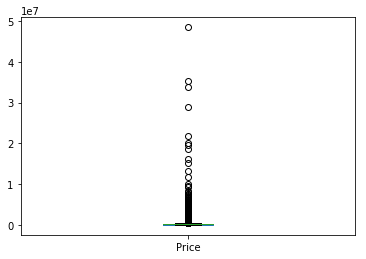

In [5]:
houses['Price'].plot.box()




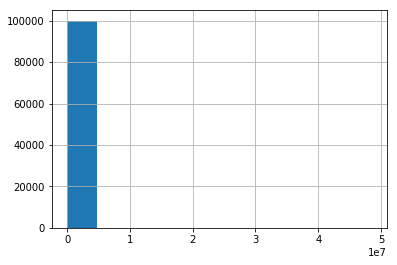

In [6]:
houses['Price'].hist()


We can see that there are many outliers. To make to make the graph more informative, we can do two things one is use logarithms and the second one is to remove the outliers.

Text(0.5, 1.0, 'Prices of real estate in England')

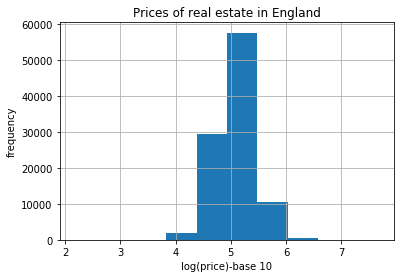

In [7]:
(houses.Price.apply(np.log10)).hist()
plt.xlabel('log(price)-base 10')
plt.ylabel('frequency')
plt.title('Prices of real estate in England')

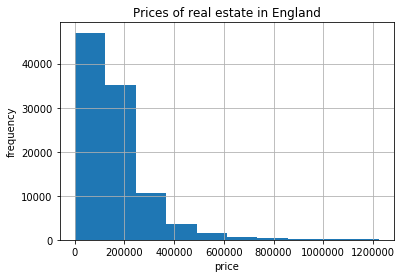

In [8]:
mean=houses.Price.mean()
std=houses.Price.std()
prices_without_outliers=houses.Price[(houses.Price< mean+3*std) & (houses.Price> mean-3*std)]
prices_without_outliers.hist()
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('Prices of real estate in England')
plt.show()

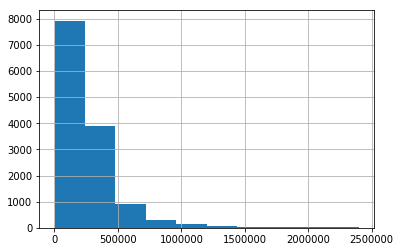

In [13]:

london=houses['Price'][houses.County.str.contains('LONDON')]
mean =london.mean()
std=london.std()
london[(london< mean+3*std) & (london> mean-3*std)].hist()


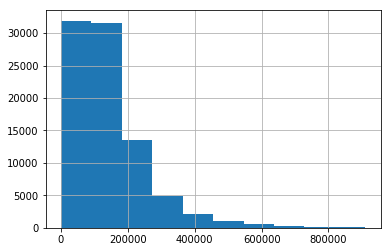

In [14]:
notlondon=houses['Price'][np.invert(houses.County.str.contains('LONDON').values)]
mean =notlondon.mean()
std=notlondon.std()
notlondon[(notlondon< mean+3*std) & (notlondon> mean-3*std)].hist()

In [15]:
london.describe()

count    1.346500e+04
mean     3.028544e+05
std      6.992992e+05
min      5.010000e+02
25%      1.250000e+05
50%      2.090000e+05
75%      3.250000e+05
max      4.846572e+07
Name: Price, dtype: float64

In [16]:
notlondon.describe()

count    8.653500e+04
mean     1.543970e+05
std      2.523737e+05
min      1.500000e+02
25%      6.934500e+04
50%      1.210000e+05
75%      1.885000e+05
max      3.536100e+07
Name: Price, dtype: float64

in the above all statisitc values for london is higher, so we can conculde from these values and histogram that real estate is expensive in London.

In [26]:
np.arange(1995,2017)

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

Text(0, 0.5, 'Price')

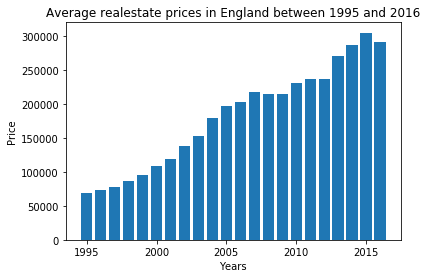

In [30]:
meanofyears=np.array([])
for i in range(1995,2017):
    meanofyears=np.append(meanofyears,np.mean(houses[houses['Date of Transfer'].str.startswith(str(i))]))
plt.bar(np.arange(1995,2017),meanofyears)  
plt.title('Average realestate prices in England between 1995 and 2016')
plt.xlabel('Years')
plt.ylabel('Price')

We can observe that the plot is left skewed. The prices of real estate increased almost monotonically.